In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_NormtoTotal.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=(~newMask)&(cpx_Glass['P_kbar_x']<15)
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<15
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)



C:\Users\penny\AppData\Local\Temp\ipykernel_29112\1610812147.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


In [4]:
Blatter=(cpx_Glass['Citation_x']=="Blatter2013_notinLEPR") &(cpx_Glass['P_kbar_x']==4)

In [5]:
# Cpx_only_Blatter=pt.calculate_cpx_only_press_all_eqs(cpx_comps=myCpxs1.loc[Blatter].reset_index(drop=True), 
#                                              H2O_Liq=myLiquids1['H2O_Liq'].loc[Blatter].reset_index(drop=True))
Cpx_only_Blatter=pt.calculate_cpx_only_press_all_eqs(cpx_comps=myCpxs1.loc[Blatter], 
                                             H2O_Liq=myLiquids1['H2O_Liq'].loc[Blatter])


In [6]:
np.min(cpx_Glass['T_K_x'].loc[Blatter])-273.15

975.0000000000001

In [7]:
np.max(cpx_Glass['T_K_x'].loc[Blatter])-273.15

1075.0

In [8]:
myLiquids1.loc[Blatter]

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
511,61.4,0.97,18.1,4.549460,0.13,2.51,5.39,4.41,1.48,0.0,0.71,4.0,0.0,0.0,0.0,0.0,511
512,58.5,1.10,18.5,5.639340,0.16,3.08,6.09,4.67,1.33,0.0,0.59,4.0,0.0,0.0,0.0,0.0,512
513,54.3,1.48,18.5,8.142146,0.18,4.23,7.26,4.27,0.89,0.0,0.41,3.3,0.0,0.0,0.0,0.0,513
514,53.7,1.71,18.0,8.518098,0.18,4.33,7.87,4.13,0.86,0.0,0.31,2.9,0.0,0.0,0.0,0.0,514
515,50.4,1.46,18.0,9.838118,0.17,5.45,9.65,3.52,0.62,0.0,0.31,2.2,0.0,0.0,0.0,0.0,515


In [9]:
P2008_eq33_eq32b=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32b",
                                               equationT="T_Put2008_eq33",
                                               )

P2008_eq33_eq32a=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32a",
                                               equationT="T_Put2008_eq33",
                                               )


P2008_eq32b_1999T2=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32b",
                                               equationT="T_Put1996_eqT2",
                                               )

P2008_eq32a_2003=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32a",
                                               equationT="T_Put2003",
                                               )

P2008_eq33_eq31=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq31",
                                               equationT="T_Put2008_eq33",
                                               )

P2008_eq33_eq30=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq30",
                                               equationT="T_Put2008_eq33",
                                               )

P2008_eq32d_eq32c=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               equationT="T_Put2008_eq32d",
                                               )


P2008_eq33_eq32c=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               equationT="T_Put2008_eq33",
                                               )



P2003_eq32c=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               equationT="T_Put2003",
                                               )

P1996_T=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put1996_eqP1",
                                               equationT="T_Put1996_eqT2",
                                               ).T_K_calc

P1996_eq32c=pt.calculate_cpx_liq_press(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2008_eq32c",
                                               T=P1996_T
                                               )

P2008_eq33_NP=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Neave2017",
                                               equationT="T_Put2008_eq33",
                                               )

P2003=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Put2003",
                                               equationT="T_Put2003",
                                               )

P_Pet=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Petrelli2020_Cpx_Liq",
                                               equationT="T_Petrelli2020_Cpx_Liq",
                                               )

J_Jorg=pt.calculate_cpx_liq_press_temp(cpx_comps=myCpxs1.loc[Blatter], 
                                             liq_comps=myLiquids1.loc[Blatter],
                                               equationP="P_Jorgenson2022_Cpx_Liq",
                                               equationT="T_Jorgenson2022_Cpx_Liq",
                                               )


Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


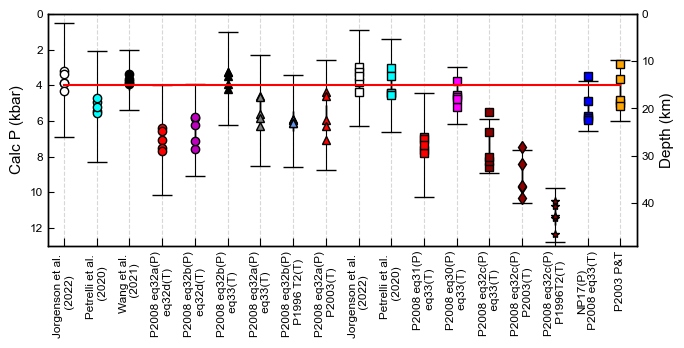

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7.6,4))
ms1=6
err=0



ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+0+err, 
             np.mean(Cpx_only_Blatter['P_Jorgenson22']), 
             yerr=3.2 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='white', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0, Cpx_only_Blatter['P_Jorgenson22'], 'ok',  mfc='white', ms=ms1, label='Petrelli20')
    
    
# Cpx-only expressions
ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+1+err, 
             np.mean(Cpx_only_Blatter['P_Petrelli20']), 
             yerr=3.1 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+1, Cpx_only_Blatter['P_Petrelli20'], 'ok',  mfc='cyan', ms=ms1, label='Petrelli20')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+2+err, 
             np.mean(Cpx_only_Blatter['P_Wang21_eq1']), 
             yerr=1.66 , xerr=0, fmt='.k',
             ecolor='k', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+2, Cpx_only_Blatter['P_Wang21_eq1'], 'ok', ms=ms1,
         mfc='k', label='Wang et al. (2021)')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+3+err, 
             np.mean(Cpx_only_Blatter['P_Put_Teq32d_Peq32a']), 
             yerr=3.1 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+3, Cpx_only_Blatter['P_Put_Teq32d_Peq32a'], 'ok', ms=ms1,
         mfc='r', label='Putirka (2008) eq32d-32a')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+4+err, 
             np.mean(Cpx_only_Blatter['P_Put_Teq32d_Peq32b']), 
             yerr=2.6 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+4, Cpx_only_Blatter['P_Put_Teq32d_Peq32b'], 'ok', ms=ms1,
         mfc='m', label='Putirka (2008) eq32d-32b')



ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+5+err, 
             np.mean(P2008_eq33_eq32b['P_kbar_calc']), 
             yerr=2.6 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+5, P2008_eq33_eq32b['P_kbar_calc'],  '^k', ms=ms1)

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+6+err, 
             np.mean(P2008_eq33_eq32a['P_kbar_calc']), 
             yerr=3.1 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+6, P2008_eq33_eq32a['P_kbar_calc'], '^k', ms=ms1,
          mfc='grey')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+7+err, 
             np.mean(P2008_eq32b_1999T2['P_kbar_calc']), 
             yerr=2.6 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+7, P2008_eq32b_1999T2['P_kbar_calc'], '^k',ms=ms1,
          mfc='cornflowerblue')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+8+err, 
             np.mean(P2008_eq32a_2003['P_kbar_calc']), 
             yerr=3.1 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+8, P2008_eq32a_2003['P_kbar_calc'],'^k', ms=ms1,
          mfc='red')





# Switching to Cpx-Liq pressures #############################33
#######################################################33
offset=10

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+err+offset-1, 
             np.mean(J_Jorg['P_kbar_calc']), 
             yerr=2.7, xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='white', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+offset-1, J_Jorg['P_kbar_calc'], 
         'sk', ms=ms1,
         mfc='white')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+err+offset, 
             np.mean(P_Pet['P_kbar_calc']), 
             yerr=2.6, xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+offset, P_Pet['P_kbar_calc'], 
         'sk', ms=ms1,
         mfc='cyan')


ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+1+err+offset, 
             np.mean(P2008_eq33_eq31['P_kbar_calc']), 
             yerr=2.9 , xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+1+offset, P2008_eq33_eq31['P_kbar_calc'], 'sk', ms=ms1,
         mfc='red', label='eq33-eq30')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+2+err+offset, 
             np.mean(P2008_eq33_eq30['P_kbar_calc']), 
             yerr=1.6 , xerr=0, fmt='.k', ecolor='k',
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+2+offset, P2008_eq33_eq30['P_kbar_calc'], 'sk', ms=ms1,
         mfc='magenta', label='eq33-eq30')
## All 32 C ones. 
ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+3+err+offset, 
             np.mean(P2008_eq33_eq32c['P_kbar_calc']), 
             yerr=1.5, xerr=0, fmt='.k', ecolor='k',
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+3+offset, P2008_eq33_eq32c['P_kbar_calc'], 'sk', ms=ms1,
         mfc='darkred', label='eq33-eq30')


ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+4+err+offset, 
             np.mean(P2003_eq32c['P_kbar_calc']), 
             yerr=1.5, xerr=0, fmt='.k', ecolor='k',
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+4+offset, P2003_eq32c['P_kbar_calc'], 'dk', ms=ms1,
         mfc='darkred', label='eq33-eq30')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+5+err+offset, 
             np.mean(P1996_eq32c), 
             yerr=1.5, xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+5+offset, P1996_eq32c, '*k', ms=ms1,
         mfc='darkred', label='eq33-eq30')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+6+err+offset, 
             np.mean(P2008_eq33_NP['P_kbar_calc']), 
             yerr=1.4, xerr=0, fmt='.k', ecolor='k', 
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+6+offset, P2008_eq33_NP['P_kbar_calc'], 'sk', ms=ms1,
         mfc='blue', label='eq33-eq30')

ax1.errorbar(np.mean(cpx_Glass['P_kbar_x'].loc[Blatter])*0+7+err+offset, 
             np.mean(P2003['P_kbar_calc']), 
             yerr=1.7, xerr=0, fmt='.k', ecolor='k',
             elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=7)
ax1.plot(cpx_Glass['P_kbar_x'].loc[Blatter]*0+7+offset, P2003['P_kbar_calc'], 'sk', ms=ms1,
         mfc='orange', label='eq33-eq30')



ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
# labels = ["Petrelli et al. (2020)", "Wang et al. (2021)", "P2008 eq32a(P)-eq32d(T)", "P2008 eq32b(P)-eq32d(T)", 
#          "P2008 eq32b(P)-eq33(T)", "P2008 eq32a(P)-eq33(T)", "P2008 eq32b(P)-P1996 T2(T)", "P2008 eq32a(P)-P2003(T)"]
labels = ["Jorgenson et al. \n (2022)", "Petrelli et al. \n (2020)", "Wang et al. \n (2021)", "P2008 eq32a(P)\n eq32d(T)", "P2008 eq32b(P)\n eq32d(T)", 
         "P2008 eq32b(P)\n eq33(T)", "P2008 eq32a(P)\n eq33(T)", "P2008 eq32b(P)\n P1996 T2(T)", "P2008 eq32a(P)\n P2003(T)",
         "Jorgenson et al. \n (2022)",
         "Petrelli et al. \n (2020)", "P2008 eq31(P)\n eq33(T)", "P2008 eq30(P)\n eq33(T)", "P2008 eq32c(P)\n  eq33(T)",
         "P2008 eq32c(P)\n P2003(T)", "P2008 eq32c(P)\n P1996T2(T)", "NP17(P)\n P2008 eq33(T)", "P2003 P&T"]



ax1.set_xticks(ticks, minor=False)
ax1.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
ax1.set_xlim([-0.5, 17.5])
#ax1.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax1.xaxis.grid(linestyle = '--', alpha=0.5)

ax1.plot([0, 17], [4, 4], '-r')




import matplotlib.patches as patches
vals=np.array([2.51, 5.1, 7.6, 10.1])

x_sq=18
# rect_UC = patches.Rectangle((-0.5,0),x_sq,2.51,linewidth=1,edgecolor='none',facecolor='yellow', alpha=0.1, zorder=0)
# rect_MC = patches.Rectangle((-0.5,2.51),x_sq,5.1-2.51,linewidth=1,edgecolor='none',facecolor='red', alpha=0.1, zorder=0)
# rect_LC = patches.Rectangle((-0.5,5.1),x_sq,7.6-5.1,linewidth=1,edgecolor='none',facecolor='blue', alpha=0.1, zorder=0)
# rect_M = patches.Rectangle((-0.5, 7.6),x_sq,10.1-7.6,linewidth=1,edgecolor='none',facecolor='grey', alpha=0.1, zorder=0)

# rect_UC2 = patches.Rectangle((-0.5,0),x_sq,2.51,linewidth=1,edgecolor='none',facecolor='yellow', alpha=0.1, zorder=0)
# rect_MC2 = patches.Rectangle((-0.5,2.51),x_sq,5.1-2.51,linewidth=1,edgecolor='none',facecolor='red', alpha=0.1, zorder=0)
# rect_LC2 = patches.Rectangle((-0.5,5.1),x_sq,7.6-5.1,linewidth=1,edgecolor='none',facecolor='blue', alpha=0.1, zorder=0)
# rect_M2 = patches.Rectangle((-0.5, 7.6),x_sq,10.1-7.6,linewidth=1,edgecolor='none',facecolor='grey', alpha=0.1, zorder=0)

# ## Adding crustal bars
# ax1.add_patch(rect_UC)
# ax1.add_patch(rect_MC)
# ax1.add_patch(rect_LC)
# ax1.add_patch(rect_M)



## Set up second axis. 
MinP1=0
MaxP1=13
MaxP2=13
MaxD1=pt.convert_pressure_to_depth(P_kbar=MaxP1, 
                                    crust_dens_kgm3=2700, g=9.81)
MaxD2=pt.convert_pressure_to_depth(P_kbar=MaxP2, 
                                    crust_dens_kgm3=2700, g=9.81)
ax1.set_ylim([MaxP1, 0])
ax1b=ax1.twinx()
ax1b.set_ylim([MaxD1[0], 0])


ax1.set_ylabel('Calc P (kbar)')
ax1b.set_ylabel('Depth (km)')



plt.subplots_adjust(bottom=0.3, wspace=0.4)
fig.savefig('Blatter_4kbar_Exp_Comparison.png', dpi=300, bbox_inches='tight')


In [11]:
MaxD2=pt.convert_pressure_to_depth(P_kbar=6, 
                                    crust_dens_kgm3=2700, g=9.81)
MaxD2

0    22.652622
dtype: float64

In [12]:
MaxD2

0    22.652622
dtype: float64

In [13]:
MaxD3=pt.convert_pressure_to_depth(P_kbar=2.8, 
                                    crust_dens_kgm3=2700, g=9.81)
MaxD3

0    10.571224
dtype: float64

In [14]:
MaxD3=pt.convert_pressure_to_depth(P_kbar=3, 
                                    crust_dens_kgm3=2700, g=9.81)
MaxD3

0    11.326311
dtype: float64

In [15]:
MaxD3=pt.convert_pressure_to_depth(P_kbar=4, 
                                    crust_dens_kgm3=2700, g=9.81)
MaxD3

0    15.101748
dtype: float64